In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import locale
locale.setlocale(locale.LC_ALL, 'sr_RS.UTF-8')
def form(value):
    if isinstance(value, (int, float, np.number)):
        return locale.format_string('%.2f', value, grouping=True)
    return str(value)
pd.options.display.float_format = lambda x: form(x)
np.set_printoptions(formatter={'all': lambda x: form(x)})

In [2]:
df = pd.read_stata('TU.dta')

In [3]:
df.head(10)

,zene,starost,satiRada,plata,region,urban,obr3,obrazovanje
0,Zena,47,"42,00",28000,Sumadija i Zapadna Srbija,Grad,Srednja skola,"12,00"
1,Muskarac,58,"42,00",9000,Sumadija i Zapadna Srbija,Grad,Osnovno skola ili manje,"8,00"
2,Muskarac,24,"42,00",11000,Sumadija i Zapadna Srbija,Grad,Osnovno skola ili manje,"8,00"
3,Zena,40,"48,00",23000,Sumadija i Zapadna Srbija,Grad,Srednja skola,"12,00"
4,Muskarac,46,"48,00",31000,Sumadija i Zapadna Srbija,Grad,Visoko obrazovanje,"16,00"
5,Muskarac,49,"42,00",11000,Sumadija i Zapadna Srbija,Grad,Visoko obrazovanje,"16,00"
6,Zena,40,"42,00",11000,Sumadija i Zapadna Srbija,Grad,Srednja skola,"12,00"
7,Muskarac,46,"42,00",14500,Sumadija i Zapadna Srbija,Grad,Srednja skola,"12,00"
8,Zena,43,"42,00",19800,Sumadija i Zapadna Srbija,Grad,Visoko obrazovanje,"14,00"
9,Zena,32,"4,00",12200,Sumadija i Zapadna Srbija,Grad,Srednja skola,"12,00"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5141 entries, 0 to 5140
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   zene         5141 non-null   category
 1   starost      5141 non-null   int8    
 2   satiRada     5135 non-null   float64 
 3   plata        5141 non-null   int32   
 4   region       5141 non-null   category
 5   urban        5141 non-null   category
 6   obr3         5141 non-null   category
 7   obrazovanje  5141 non-null   float32 
dtypes: category(4), float32(1), float64(1), int32(1), int8(1)
memory usage: 106.1 KB


In [5]:
df = df[df['satiRada'].isna() == 0]

In [6]:
print(df['satiRada'].unique(),'\n',df['obrazovanje'].unique())

[42,00 48,00 4,00 70,00 56,00 80,00 30,00 28,00 40,00 8,00 60,00 35,00
 0,00 5,00 52,00 50,00 75,00 20,00 45,00 84,00 99,00 18,00 12,00 16,00
 33,00 36,00 65,00 55,00 88,00 2,00 25,00 9,00 7,00 10,00 1,00 49,00 54,00
 15,00 24,00 53,00 17,00 90,00 66,00 39,00 72,00 100,00 85,00 47,00 74,00
 44,00 58,00 21,00 63,00 96,00 32,00 43,00 46,00 37,00 3,00 6,00 38,00
 22,00 26,00 91,00 14,00 62,00 105,00 64,00 98,00 126,00 68,00 78,00 77,00
 13,00 51,00 34,00 23,00 59,00 31,00 67,00 57,00] 
 [12,00 8,00 16,00 14,00 4,00 11,00 0,00 18,00 10,00 20,00]


In [7]:
df['obrazovanje'] = df['obrazovanje'].astype(int)
df['satiRada'] = df['satiRada'].astype(int)

In [8]:
df.describe()

,starost,satiRada,plata,obrazovanje
count,"5.135,00","5.135,00","5.135,00","5.135,00"
mean,"42,04","43,53","20.435,09","11,31"
std,"11,84","17,41","14.760,90","2,98"
min,"16,00","0,00","500,00","0,00"
25%,"33,00","40,00","12.000,00","11,00"
50%,"42,00","40,00","18.000,00","12,00"
75%,"51,00","50,00","25.000,00","12,00"
max,"84,00","126,00","230.000,00","20,00"


In [9]:
df = df[(df['satiRada'] > 0) & (((df['starost'] < 65) & (df['zene'] == 'Muskarac')) | ((df['starost']< 60) & (df['zene'] == 'Zena')))]
df.describe()

,starost,satiRada,plata,obrazovanje
count,"4.776,00","4.776,00","4.776,00","4.776,00"
mean,"40,94","45,08","20.903,81","11,51"
std,"10,70","15,39","14.459,53","2,73"
min,"16,00","1,00","500,00","0,00"
25%,"32,00","40,00","12.000,00","11,00"
50%,"41,00","40,00","18.000,00","12,00"
75%,"50,00","50,00","25.000,00","12,00"
max,"64,00","126,00","200.000,00","20,00"


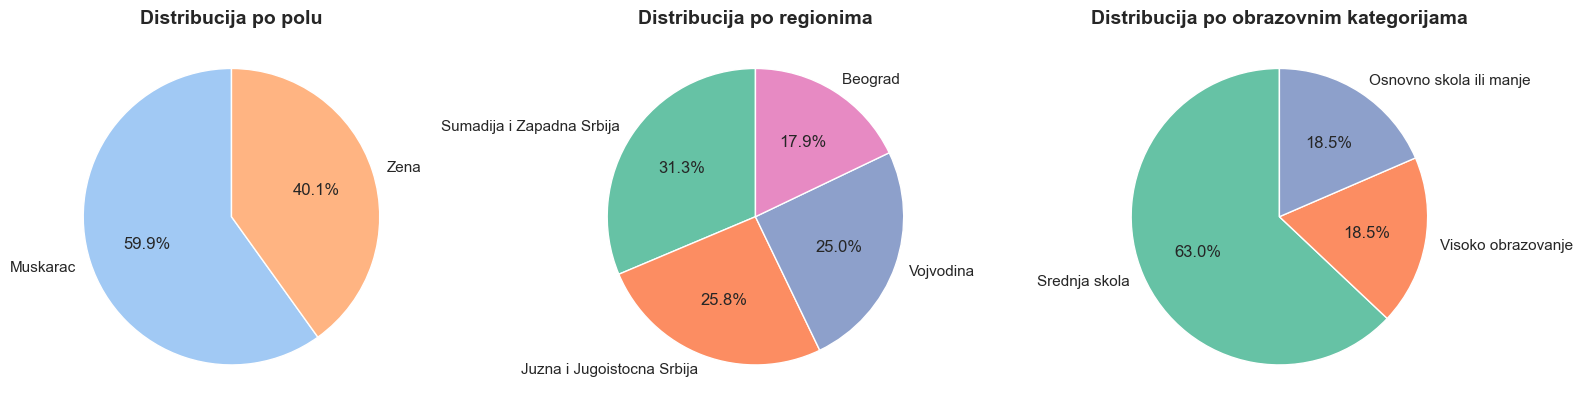

In [10]:
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(16, 16))

plt.subplot(1, 3, 1)
pol_counts = df['zene'].value_counts()
plt.pie(pol_counts, labels=pol_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=sns.color_palette("pastel", len(pol_counts)), labeldistance=1.1)
plt.title('Distribucija po polu', fontsize=14, fontweight='bold')

plt.subplot(1, 3, 2)
region_counts = df['region'].value_counts()
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=sns.color_palette("Set2", len(region_counts)), labeldistance=1.1)
plt.title('Distribucija po regionima', fontsize=14, fontweight='bold')

plt.subplot(1, 3, 3)
obr3_counts = df['obr3'].value_counts()
plt.pie(obr3_counts, labels=obr3_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=sns.color_palette("Set2", len(obr3_counts)), labeldistance=1.1)
plt.title('Distribucija po obrazovnim kategorijama', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

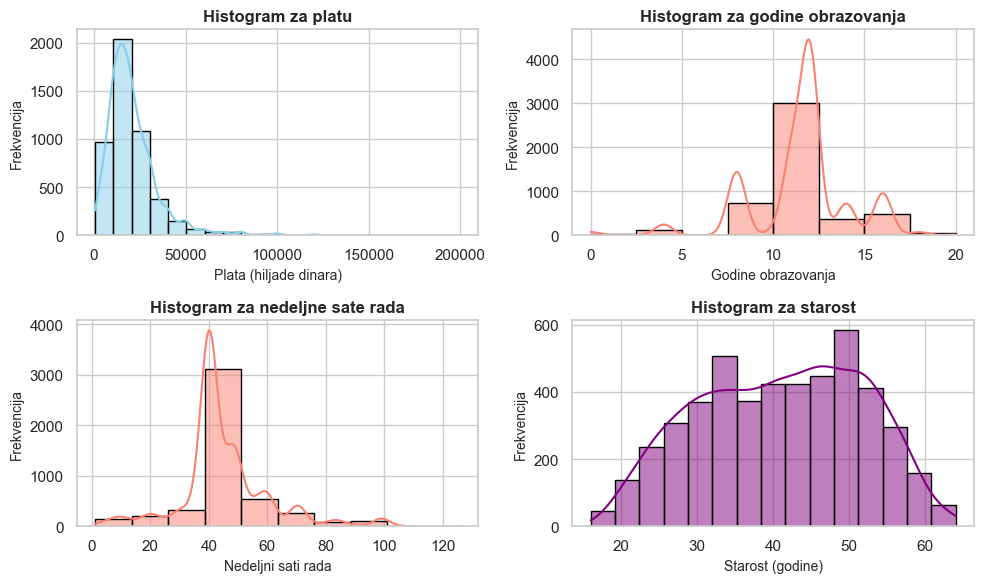

In [11]:
plt.figure(figsize=(10, 6)) 

plt.subplot(2, 2, 1)
sns.histplot(df['plata'], bins=20, kde=True, color='skyblue', edgecolor='black', stat="count")
plt.title('Histogram za platu', fontsize=12, fontweight='bold')
plt.xlabel('Plata (hiljade dinara)', fontsize=10)
plt.ylabel('Frekvencija', fontsize=10)
plt.grid(True)  

plt.subplot(2, 2, 2)
sns.histplot(df['obrazovanje'], bins=8, kde=True, color='salmon', edgecolor='black', stat="count")
plt.title('Histogram za godine obrazovanja', fontsize=12, fontweight='bold')
plt.xlabel('Godine obrazovanja', fontsize=10)
plt.ylabel('Frekvencija', fontsize=10)
plt.grid(True)  

plt.subplot(2, 2, 3)
sns.histplot(df['satiRada'], bins=10, kde=True, color='salmon', edgecolor='black', stat="count")
plt.title('Histogram za nedeljne sate rada', fontsize=12, fontweight='bold')
plt.xlabel('Nedeljni sati rada', fontsize=10)
plt.ylabel('Frekvencija', fontsize=10)
plt.grid(True)

plt.subplot(2, 2, 4) 
sns.histplot(df['starost'], bins=15, kde=True, color='purple', edgecolor='black', stat="count")
plt.title('Histogram za starost', fontsize=12, fontweight='bold')
plt.xlabel('Starost (godine)', fontsize=10)
plt.ylabel('Frekvencija', fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.show()


In [12]:
stats.jarque_bera(df['plata'])

SignificanceResult(statistic=np.float64(56177.39382059841), pvalue=np.float64(0.0))

In [13]:
df['satnica'] = df['plata'] / (df['satiRada'] * (52 / 12))

In [14]:
def izbaciOutliere(varijabla, df = df):
    Q1 = df[varijabla].quantile(0.25)
    Q3 = df[varijabla].quantile(0.75)
    IQR = Q3 - Q1
    
    donjaGranica = Q1 - 1.5*IQR
    gornjaGranica = Q3 + 1.5*IQR

    ukupnoIzbaceno = df[(df[varijabla] < donjaGranica) | (df[varijabla] > gornjaGranica)].shape[0]
    df = df[(df[varijabla] >= donjaGranica) & (df[varijabla] <= gornjaGranica)].reset_index(drop = True)
    print(f'Iz baze je izbacen svaki ispitanik kod koga je {varijabla} manja od {donjaGranica}, odnosno veca od {gornjaGranica}.')
    print(f'Iz baze je izbaceno  {ukupnoIzbaceno} outliera')
    print(f'Nakon izbacivanja outliera: {df.shape[0]}')
    return df
df = izbaciOutliere('satiRada', df = df)
df = izbaciOutliere('satnica',df = df)

Iz baze je izbacen svaki ispitanik kod koga je satiRada manja od 25.0, odnosno veca od 65.0.
Iz baze je izbaceno  766 outliera
Nakon izbacivanja outliera: 4010
Iz baze je izbacen svaki ispitanik kod koga je satnica manja od -43.269230769230816, odnosno veca od 256.7307692307693.
Iz baze je izbaceno  205 outliera
Nakon izbacivanja outliera: 3805


In [15]:
df.describe()

,starost,satiRada,plata,obrazovanje,satnica
count,"3.805,00","3.805,00","3.805,00","3.805,00","3.805,00"
mean,"40,57","44,05","19.246,63","11,53","102,84"
std,"10,61","7,38","9.384,32","2,50","50,75"
min,"16,00","25,00","1.000,00","0,00","3,85"
25%,"32,00","40,00","12.000,00","11,00","65,93"
50%,"41,00","40,00","18.000,00","12,00","92,31"
75%,"49,00","48,00","25.000,00","12,00","134,62"
max,"64,00","65,00","65.000,00","20,00","256,41"


In [16]:
print((df['satnica'] < 55).sum())
df = df[df['satnica'] > 55]
df.reset_index(inplace=True)
df.describe()

606


,index,starost,satiRada,plata,obrazovanje,satnica
count,"3.199,00","3.199,00","3.199,00","3.199,00","3.199,00","3.199,00"
mean,"1.882,00","40,52","43,48","21.420,56","11,80","115,09"
std,"1.118,55","10,37","6,89","8.570,89","2,38","45,74"
min,"0,00","16,00","25,00","6.000,00","0,00","55,29"
25%,"883,50","32,00","40,00","15.000,00","11,00","76,92"
50%,"1.873,00","41,00","40,00","20.000,00","12,00","103,85"
75%,"2.856,50","49,00","48,00","25.500,00","12,00","144,23"
max,"3.804,00","64,00","65,00","65.000,00","20,00","256,41"


In [17]:
pd.to_pickle(df, 'df.pkl')

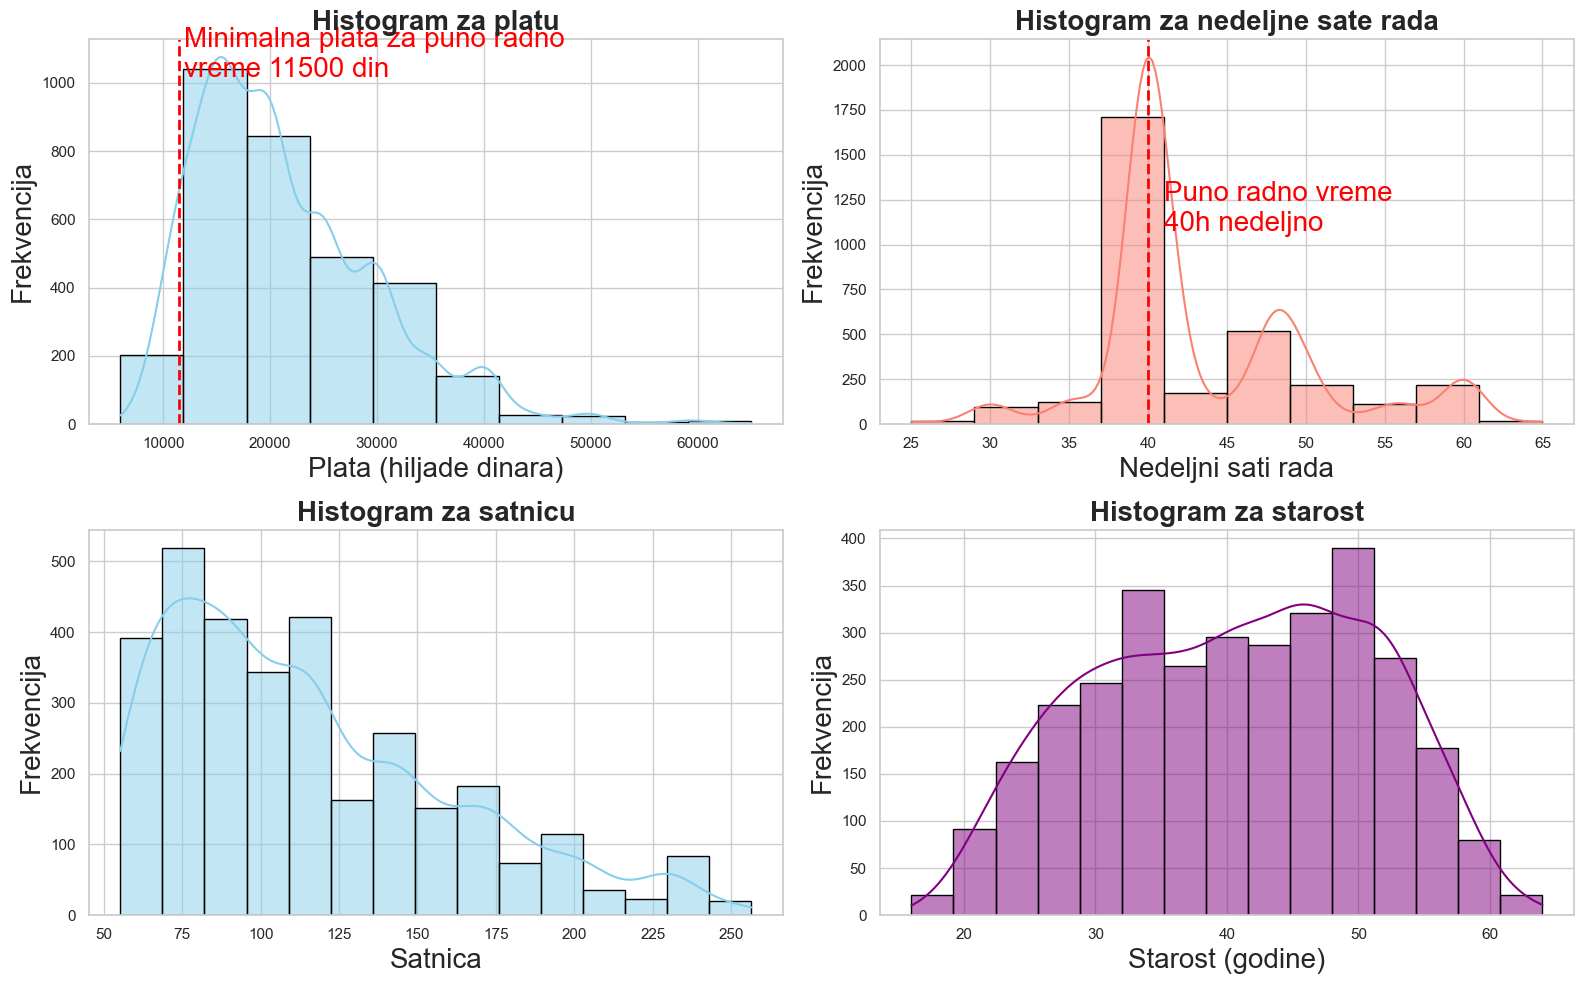

In [18]:
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(16, 10))  # Povećajte veličinu cele figure (slike)

plt.subplot(2, 2, 1)
sns.histplot(df['plata'], bins=10, kde=True, color='skyblue', edgecolor='black', stat="count")

plt.title('Histogram za platu', fontsize=20, fontweight='bold')
plt.xlabel('Plata (hiljade dinara)', fontsize=20)
plt.ylabel('Frekvencija', fontsize=20)

plt.axvline(x=11500, color='red', linestyle='--', linewidth=2 )
plt.text(12000, plt.ylim()[1] * 0.9, 'Minimalna plata za puno radno\nvreme 11500 din', color='red', fontsize=20)
# Dodajte mrežu
plt.grid(True)

plt.subplot(2, 2, 2)
sns.histplot(df['satiRada'], bins=10, kde=True, color='salmon', edgecolor='black', stat="count")
plt.title('Histogram za nedeljne sate rada', fontsize=20, fontweight='bold')
plt.xlabel('Nedeljni sati rada', fontsize=20)
plt.ylabel('Frekvencija', fontsize=20)
plt.axvline(x=40, color='red', linestyle='--', linewidth=2)
plt.text(41, plt.ylim()[1] * 0.5, 'Puno radno vreme\n40h nedeljno', color='red', fontsize=20)
plt.grid(True)

plt.subplot(2, 2, 3)
sns.histplot(df['satnica'], bins=15, kde=True, color='skyblue', edgecolor='black', stat="count")
plt.title('Histogram za satnicu', fontsize=20, fontweight='bold')
plt.xlabel('Satnica', fontsize=20)
plt.ylabel('Frekvencija', fontsize=20)
plt.grid(True)

plt.subplot(2, 2, 4) 
sns.histplot(df['starost'], bins=15, kde=True, color='purple', edgecolor='black', stat="count")
plt.title('Histogram za starost', fontsize=20, fontweight='bold')
plt.xlabel('Starost (godine)', fontsize=20)
plt.ylabel('Frekvencija', fontsize=20)
plt.grid(True)

# Podesite raspored da bi sve stalo
plt.tight_layout()

# Prikazivanje grafika
plt.show()

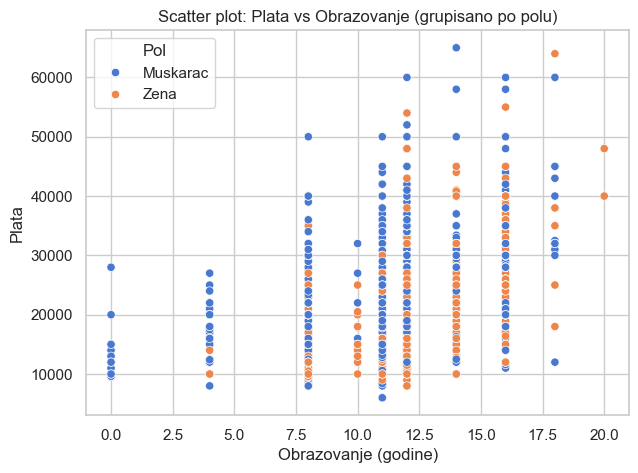

In [19]:
plt.figure(figsize=(7, 5))  

sns.scatterplot(x=df['obrazovanje'], y=df['plata'], hue=df['zene'])

plt.title('Scatter plot: Plata vs Obrazovanje (grupisano po polu)')
plt.xlabel('Obrazovanje (godine)')
plt.ylabel('Plata')

plt.legend(title='Pol')

plt.show()

In [20]:
df.iloc[df['plata'].argmax()]

index                         440
zene                     Muskarac
starost                        53
satiRada                       65
plata                       65000
region                   Beograd 
urban                        Grad
obr3           Visoko obrazovanje
obrazovanje                    14
satnica                    230,77
Name: 403, dtype: object

In [99]:
class Bootstrap():
    def __init__(self, df, alfaList = np.array([0.1, 0.05, 0.01]), n=None):
        self.df = df
        self.alfaList = sorted(alfaList)
        self.n = n if n is not None else int(len(df) * 0.1)

        self.N = len(df)

    def fit(self, k, seed=42):
        self.sredineUzoraka = []
        self.varijanseUzoraka = []
        for i in range(k):
            uzorak = self.df['plata'].sample(n=self.n, random_state=seed + i)
            self.sredineUzoraka.append(uzorak.mean())
            self.varijanseUzoraka.append(uzorak.var())
        self.sredineUzoraka = pd.Series(self.sredineUzoraka)
        self.varijanseUzoraka = pd.Series(self.varijanseUzoraka)

    @property
    def sredina(self):
        return self.sredineUzoraka.mean()

    @property
    def varijansa(self):
        return self.varijanseUzoraka.mean()
        
    @property
    def jbTest(self):
        test = stats.jarque_bera(self.sredineUzoraka)
        return pd.Series([test.statistic, test.pvalue], index = ['hi^2', 'p'])

    def interval(self, alfa = None):
        alfa = self.alfaList if alfa is None else alfa
        alfa = np.atleast_1d(alfa)
        intervali = []
        for a in alfa:
            donja = self.sredineUzoraka.quantile(a / 2)
            gornja = self.sredineUzoraka.quantile(1 - a / 2)
            intervali.append([donja, gornja])
        return pd.DataFrame(intervali, columns=["donja", "gornja"], index = [f"{int((1 - a) * 100)}%" for a in alfa])

    def d(self, alfa = None):
        alfa = self.alfaList if alfa is None else alfa
        intervals = self.interval(alfa)
        return ((intervals["gornja"] - intervals["donja"]) / 2).rename('d')

    def plotDist(self, alfa = None):
        alfa = self.alfaList if alfa is None else alfa
        boje = plt.cm.tab10.colors
        plt.figure(figsize=(12, 6))
        sns.histplot(self.sredineUzoraka, bins=50, kde=True, color='skyblue', edgecolor='black', stat="count")
        plt.title('Distribucija bootstrap proseka plata', fontsize=16)
        plt.xlabel('Proseci plata', fontsize=14)
        plt.ylabel('Frekvencija', fontsize=14)
        plt.grid(True)

        plt.axvline(x=self.sredina, color='blue', linestyle='-', label=f'Srednja vrednost: {self.sredina:.2f}')
        for a, boja in zip(alfa, boje):
            donja, gornja =  self.interval(a).iloc[0]
            plt.axvline(x=donja, color= boja, linestyle='--', label=f'{int((1 - a)*100)}% interval')
            plt.axvline(x=gornja, color= boja, linestyle='--')

        plt.legend()
        plt.show()

    def obimUzorka(self, alfa = None):
        alfa = self.alfaList if alfa is None else alfa
        alfa = np.atleast_1d(alfa)
        nList, dList, indeksi = [], [], []
    
        for a in alfa:
            d = self.d([a]).values[0]
            Z = stats.norm.ppf(1 - a / 2)
            Sy2 = self.varijanseUzoraka.mean()
            n0 = (np.square(Z) * Sy2) / np.square(d)
            n = int(1 / (1 / n0 + 1 / self.N))
            nList.append(n)
            indeksi.append(f"{int((1 - a) * 100)}%")
            dList.append(d)
    
        return pd.DataFrame({'n': nList, 'd': dList}, index=indeksi)

    @property
    def pregled(self):
        data = pd.Series({"Prosečna sredina": self.sredina, "Prosečna varijansa": self.varijansa})
        
        d = self.d()
        d.index = [f"d({(1 - a) * 100:.0f})%" for a in self.alfaList]
    
        data = pd.concat([data,self.jbTest, d])
    
        return data
        
    def __repr__(self):
        return f"Bootstrap | n={self.n} | N={self.N} | bootstrap uzoraka={len(self.sredineUzoraka)}"

In [104]:
bs = Bootstrap(df, [0.13, 0.1, 0.075, 0.05, 0.01, 0.2, 0.25, 0.4, 0.5])
bs.fit(1000)
bs.pregled

Prosečna sredina         21.451,98
Prosečna varijansa   73.897.473,27
hi^2                          3,70
p                             0,16
d(99)%                    1.137,44
d(95)%                      907,93
d(92)%                      863,42
d(90)%                      794,02
d(87)%                      760,32
d(80)%                      613,42
d(75)%                      556,86
d(60)%                      408,45
d(50)%                      329,95
dtype: float64

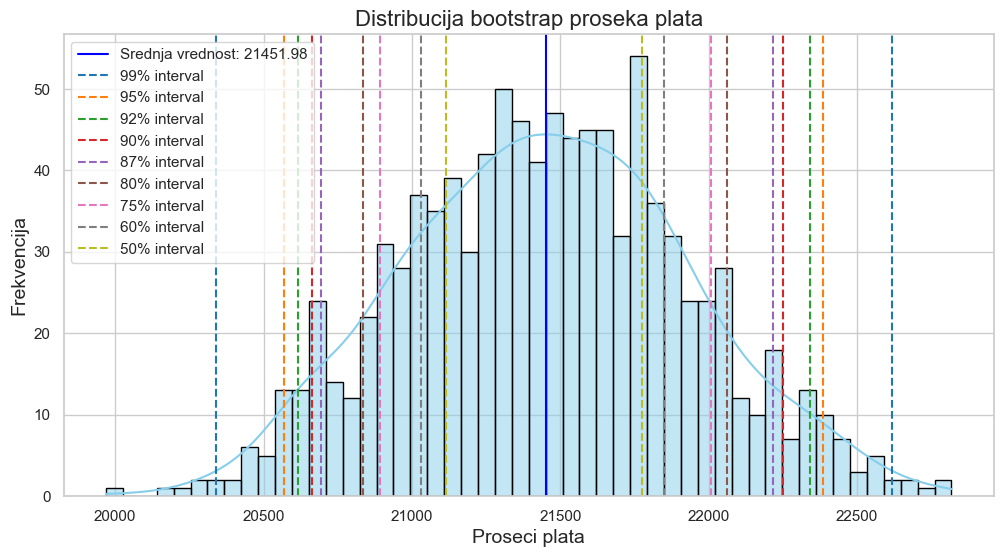

Bootstrap | n=319 | N=3199 | bootstrap uzoraka=1000


In [105]:
bs.plotDist()
print(bs)

In [106]:
obim = bs.obimUzorka()
obim

,n,d
99%,338,"1.137,44"
95%,310,"907,93"
92%,286,"863,42"
90%,288,"794,02"
87%,268,"760,32"
80%,293,"613,42"
75%,287,"556,86"
60%,285,"408,45"
50%,281,"329,95"


In [108]:
bs = Bootstrap(df)
opt = obim.loc[obim['n'].idxmax()]
bs.n = np.int_(opt['n'])
print(f' n: {bs.n}\n d:{opt['d']}\n nivo pouzdanosti: {obim['n'].idxmax()}')
bs.fit(1000)
print(f' JB statistika {bs.jbTest.loc['hi^2']}')
bs

 n: 338
 d:1137.4369278996855
 nivo pouzdanosti: 99%
 JB statistika 4.479407314990495


Bootstrap | n=338 | N=3199 | bootstrap uzoraka=1000

In [109]:
print('Korelacija nedeljnih sati rada i plate\n',form(df.satiRada.corr(df.plata)),'\nKorelacija godina obrazovanja i plate\n', form(df.obrazovanje.corr(df.plata)),'\nKorelacija starosti i plate\n', form(df.starost.corr(df.plata)))

Korelacija nedeljnih sati rada i plate
 0,19 
Korelacija godina obrazovanja i plate
 0,41 
Korelacija starosti i plate
 0,12


In [592]:
class ONK:
    def __init__ (self, alfa = None):
        '''
        Parametri:
        - alfa: Rizik greske pri testiranju (vrednosti izmedju 0 i 1)
        Podrazumevana lista vrednosti je [0.1, 0.05, 0.01] na to je dodaje prosledjena alfa 
        '''
        default = [0.1, 0.05, 0.01]
        if alfa is None:
            self.alfa = default
        elif isinstance(alfa, (float, int)):
            if alfa < 0 or alfa > 1:
                raise ValueError('Alfa mora biti izmedju 1 i 0')
            self.alfa = sorted(set(default + [alfa]))
        else:
            for a in alfa:
                if a < 0 or a > 1:
                    raise ValueError('Alfa mora biti izmedju 1 i 0')
            self.alfa = sorted(set(default + list(alfa)))
        self.x = None
        self.y = None
        self.m = None
        self.n = None
        self.b = None
        self.bstd = None
        self.tstat = None
        

    def fit(self,x ,y, konstanta = True):
        '''Treniranje modela pomoću sistema normalnih jednačina (OLS).
        
        Parametri:
        - x: pd.DataFrame – matrica objašnjavajućih promenljivih
        - y: pd.Series – zavisna promenljiva
        - konstanta: bool – da li dodati konstantu ('const') u model
        
        Povratna vrednost:
        - pd.DataFrame sa rezultatima regresije'''       
        self.x = x.copy()
        self.y = y.copy()
        self.m = self.x.shape[0]
        self.n = self.x.shape[1]
        self.t = {a : abs(stats.t.ppf( a / 2, self.m - self.n)) for a in self.alfa}
        
        if konstanta and 'const' not in self.x.columns:
            self.x.insert(0,'const',1)
            self.n += 1

    
        self.b = pd.Series(np.linalg.inv(self.x.T @ self.x) @ (self.x.T @ self.y), index = self.x.columns)
        ykappa = self.x @ self.b
        res = self.y - ykappa
        sigma2 = res.T @ res / (self.m - self.n)
        self.bstd = pd.Series(np.sqrt(np.diag(np.linalg.inv(self.x.T @ self.x) * sigma2)),index = self.x.columns)
        self.tstat = pd.Series(self.b / self.bstd, index = self.x.columns)

        def znacajnost(t):
            if abs(t) > self.t[0.1]:
                return "*" * sum(abs(t) >= self.t[a] for a in [.1, .05, .01])

   
    
        sig = self.tstat.apply(lambda t:  "*" * sum(abs(t) >= self.t[a] for a in [.1, .05, .01]) if abs(t) > self.t[0.1] else '')
 
        model = pd.concat([self.b,self.bstd,self.tstat, sig],axis = 1)
        model.columns = ['koeficijent', 'std', 't', 'sig']
        return model

    def fitsig(self, alfa = 0.1):
        self.fit(self.x, self.y)
        maska = (~self.b.index.str.contains('region')) & (~self.b.index.str.contains('const'))
        
        for i in range(len(self.b[maska])):
            if abs(self.tstat[maska].iloc[i]) < self.t[alfa]:
                print(f'Promenjiva {self.b[maska].index[i]} je statisticki neznacajna, t vrednost:\n{self.tstat[maska].iloc[i]}')
                self.x = self.x.drop(self.b[maska].index[i], axis = 1)
                maska = (~self.b.index.str.contains('region')) & (~self.b.index.str.contains('const'))
                return self.fitsig(alfa)
        if (abs(self.b[~maska].drop('const') / self.bstd[~maska].drop('const')) < self.t[alfa]).all():
            self.x = self.x.drop(self.x.columns[self.x.columns.str.startswith('region')], axis = 1)
            self.b = self.b[~self.b.index.str.startswith('region')]
            print(f'Regioni su statisticki neznacajni t statistike :\n {self.tstat[~maska].drop('const')}')
            
        return self.fit(self.x, self.y)
    @property
    def matOblik (self):
        koeficijenti = []
        for var,koef in self.b.items():
            if var.lower() == 'const':
                koeficijenti.append(f'{form(koef)}')
            else:
                koeficijenti.append(f'{form(koef)} *{var}')
        jednacina = f"{self.y.name} = " + " + ".join(koeficijenti)
        return jednacina

    def predict(self, vektor, mean = False, total = False):
        if not 'const' in vektor.columns:
            vektor.insert(0,'const',1)
        predikcija = vektor @ self.b
        if mean:
            return predikcija.mean()
        elif total:
            return predikcija.sum()
        else:
            return predikcija

In [593]:
def vestackePromenjive(df):
    vestacke = pd.get_dummies(df[['region', 'zene','urban']] , drop_first=True, dtype = float)
    x = pd.concat([df[['obrazovanje', 'satiRada','starost']], vestacke], axis=1)
    return x
X = vestackePromenjive(df)
Y = df['plata']

In [594]:
bole = ONK([.5, 0.025, 0.125, 0.075])

In [595]:
bole.fit(X[:200],Y[:200])

,koeficijent,std,t,sig
const,"-13.090,08","5.052,33","-2,59",**
obrazovanje,"1.476,35","232,23","6,36",***
satiRada,"340,19","80,77","4,21",***
starost,"101,81","50,91","2,00",**
region_Vojvodina,"-1.018,33","1.679,18","-0,61",
region_Sumadija i Zapadna Srbija,"-2.169,39","1.602,69","-1,35",
region_Juzna i Jugoistocna Srbija,"-2.086,03","1.595,57","-1,31",
zene_Zena,"-3.255,95","1.157,86","-2,81",***
urban_Grad,"1.363,33","1.139,66","1,20",


In [596]:
bole.fitsig(alfa = 0.05)

Promenjiva urban_Grad je statisticki neznacajna, t vrednost:
1.196260583373595
Regioni su statisticki neznacajni t statistike :
 region_Vojvodina                    -0,66
region_Sumadija i Zapadna Srbija    -1,49
region_Juzna i Jugoistocna Srbija   -1,29
dtype: float64


,koeficijent,std,t,sig
const,"-15.675,66","4.791,65","-3,27",***
obrazovanje,"1.542,79","227,19","6,79",***
satiRada,"360,82","79,86","4,52",***
starost,"104,68","50,70","2,06",**
zene_Zena,"-3.013,45","1.136,44","-2,65",***


In [597]:
bole.fitsig(alfa=0.01)

Promenjiva starost je statisticki neznacajna, t vrednost:
2.0648460600972585
Regioni su statisticki neznacajni t statistike :
 Series([], dtype: float64)


,koeficijent,std,t,sig
const,"-11.736,11","4.431,87","-2,65",***
obrazovanje,"1.579,11","228,39","6,91",***
satiRada,"358,73","80,52","4,46",***
zene_Zena,"-3.188,21","1.142,68","-2,79",***


In [598]:
bole.matOblik

'plata = -11.736,11 + 1.579,11 *obrazovanje + 358,73 *satiRada + -3.188,21 *zene_Zena'

In [599]:
Ytotal = df['plata'].sum()
Ybar = df['plata'].mean()
print(f'Total plate je {form(Ytotal)}, a prosek je {form(Ybar)}')
df = df.drop('satnica',axis =1 )

Total plate je 68.524.376,00, a prosek je 21.420,56


KeyError: "['satnica'] not found in axis"

`PSU`

In [127]:
def psu(n, seed=1304):
    uzorak = df.sample(n=n, replace=False, random_state=seed)

    print('Uzorak', uzorak.describe(), '\nDf\n', df.describe(), sep='\n')

    Y = df['plata']
    Ym = Y.mean()
    X = df['obrazovanje']
    Xm = X.mean()
    y = uzorak['plata']
    ym = y.mean()
    x = uzorak['obrazovanje']
    xm = x.mean()
    N = len(df)
    f = n / N

    print(f'Populacija:\nTotal mesecne zarade {form(Y.sum())}\nTotal godina obrazovanja {form(X.sum())}', sep='\n')
    print(f'Uzorak (korigovan ekspanzivnim faktorom):\nTotal mesecne zarade {form(y.sum() * 1 / f)}\nTotal godina obrazovanja {form(x.sum() * 1 / f)}', sep='\n')

    R = Y.sum() / X.sum()
    Ru = y.sum() / x.sum()
    print(f'Količnik obeležja populacije: {form(R)}\nKoličnik obeležja uzorka: {form(Ru)}', sep='\n')

    YtotalKapa = Ru * X.sum()
    YbarKapa = Ru * Xm
    pristrastnostR = YbarKapa - Ym
    print(f'Kolicnicka ocena sredine obeležja Y: {form(YbarKapa)}\nStvarna sredina populacije {form(Ym)}', sep='\n')
    print(f'Kolicnicka ocena totala obeležja Y: {form(YtotalKapa)}\nStvarni total populacije {form(Y.sum())}', sep='\n')
    print(f'Pristrasnost varijable obrazovanje: \nZa kolicnicku ocenu sredine {form(pristrastnostR)}\nZa kolicnicku ocenu totala {form(YtotalKapa - Y.sum())}', sep='\n')
    print(f'Relativna pristrasnost : {form(((YbarKapa - Ym) / Ym * 100))}%', sep='\n')

    s = np.square(Y - (X * R)).sum()
    SYt = np.sqrt(s * (np.square(N) * (1 - f)) / (n * (N - 1)))
    SYm = np.sqrt(s * (1 - f) / (n * (N - 1)))
    SR = np.sqrt(s * (1 - f) / (n * Xm**2 * (N - 1)))
    
    print(f'Standardna devijacija količničničke ocena totala obeležja Y: \n{form(SYt)}')
    print(f'Standardna devijacija količničničke ocena sredine obeležja Y: \n{form(SYm)}')
    print(f'Standardna devijacija količnika uzorka: \n{form(SR)}')

    alfa = 0.05
    t = stats.t.ppf(1 - alfa / 2, n - 1)
    Ym_95 = (YbarKapa - t * SYm, YbarKapa + t * SYm)
    print(f'95% interval poverenja za sredinu mesecne zarade u populaciji {Ym_95}\nRaspon intervala za PSU je {form(Ym_95[1] - Ym_95[0])}')

    print('REGRESIONO OCENJIVANJE')
    X = vestackePromenjive(df)
    x = vestackePromenjive(uzorak)
    
    model = ONK(x,y)
    print(f'Metodom obicnih najmanjih kvadrata ocenjen je model \n{model.fit()}')
    print(model.matOblik())
    xm = x.mean()
    X.insert(0,'const',1)
    Xm = X.mean()
    ybarlr = ym + (Xm - xm) @ model.b


    pristrasnostLr = ybarlr - ym
    rho = x.drop(columns=['const']).apply(lambda col: col.corr(y))
    sy = sum(np.square(y - Ym)) / (n - 1)
    Sylrs = np.sqrt((1 - rho**2) * sy * ((1 - f) / n))
    t = stats.t.ppf(1 - alfa / 2, n - 1)
    Ybarlr95 = (ybarlr - t * Sylrs.iloc[0], ybarlr + t * Sylrs.iloc[0])
    
    ybarlr2 = model.predvidi(x, mean = True)

    print(f'Regresiona ocena sredine {form(ybarlr)}')
    print(f' Standardna devijacije regresione ocene sredine \n{Sylrs}')
    print(f'Pristrasnost regresionog ocenjivanja za ocenu sredine {form(pristrasnostLr)}')
    print(f'Ako je poznat vektor objasnjavajucih promenjivih nije poznat za celu populaciju ocena sredine je {form(ybarlr2)}')
    print(f'90% interval poverenja za sredinu obelezja {Ybarlr95}\nRaspon intervala za PSU je {form(Ybarlr95[1] - Ybarlr95[0])}')

    Ytotallr1 = model.predvidi(X, total = True)
    Ytotallr2 = model.predvidi(x, total = True) * N / n
    print(f'Dve ocene totala plate su: {form(Ytotallr1)} {form(Ytotallr2)}\nA pravi total je {form(Y.sum())}')

    SKGR = np.square(pristrastnostR) + np.square(SYm)
    SKGLr = np.square(pristrasnostLr) + np.square(Sylrs.iloc[0])
    print(f'Srednja kvadratna greska kolicnickog ocenjivanja {form(SKGR)}\nSrednja kvadratna greska regresionog ocenjivanja {form(SKGLr)}')

In [75]:
psu(n = 200 , seed = 1304)

NameError: name 'psu' is not defined

In [39]:
psu(n)

Uzorak
       starost  satiRada     plata  obrazovanje
count   294,00    294,00    294,00       294,00
mean     41,96     42,83 20.730,72        11,50
std       9,99      6,09  8.459,21         2,55
min      17,00     25,00  8.000,00         0,00
25%      35,00     40,00 15.000,00        11,00
50%      43,00     40,00 20.000,00        12,00
75%      50,00     48,00 25.000,00        12,00
max      62,00     65,00 60.000,00        18,00

Df

       starost  satiRada     plata  obrazovanje
count 3.199,00  3.199,00  3.199,00     3.199,00
mean     40,52     43,48 21.420,56        11,80
std      10,37      6,89  8.570,89         2,38
min      16,00     25,00  6.000,00         0,00
25%      32,00     40,00 15.000,00        11,00
50%      41,00     40,00 20.000,00        12,00
75%      49,00     48,00 25.500,00        12,00
max      64,00     65,00 65.000,00        20,00
Populacija:
Total mesecne zarade 68.524.376,00
Total godina obrazovanja 37.736,00
Uzorak (korigovan ekspanzivnim faktorom):


In [40]:
psu(2 * n)

Uzorak
       starost  satiRada     plata  obrazovanje
count   588,00    588,00    588,00       588,00
mean     41,19     42,79 21.136,96        11,75
std      10,07      6,34  8.260,45         2,42
min      17,00     25,00  8.000,00         0,00
25%      34,00     40,00 15.000,00        11,00
50%      42,00     40,00 20.000,00        12,00
75%      49,00     48,00 25.000,00        12,00
max      62,00     65,00 60.000,00        18,00

Df

       starost  satiRada     plata  obrazovanje
count 3.199,00  3.199,00  3.199,00     3.199,00
mean     40,52     43,48 21.420,56        11,80
std      10,37      6,89  8.570,89         2,38
min      16,00     25,00  6.000,00         0,00
25%      32,00     40,00 15.000,00        11,00
50%      41,00     40,00 20.000,00        12,00
75%      49,00     48,00 25.500,00        12,00
max      64,00     65,00 65.000,00        20,00
Populacija:
Total mesecne zarade 68.524.376,00
Total godina obrazovanja 37.736,00
Uzorak (korigovan ekspanzivnim faktorom):


In [41]:
def strat(n, x, y='', z='', seed=1304):
    if z != '':
        df['Strata'] = df[x].astype(str) + '_' + df[y].astype(str) + '_' + df[z].astype(str)
    elif y != '':
        df['Strata'] = df[x].astype(str) + '_' + df[y].astype(str)
    else:
        df['Strata'] = df[x].astype(str)
        
    strata_counts = df['Strata'].value_counts(normalize=True)
    nh = (strata_counts * n).round().astype(int)
    print(nh, '\n\n')

    uzorak = None
    for strata, count in nh.items():
        stratGrupa = df[df['Strata'] == strata]  
        stratUzorak = stratGrupa.sample(n=count, random_state=seed)  
        uzorak = pd.concat([uzorak, stratUzorak], axis=0)  
        
    uzorak = uzorak.reset_index(drop=True)
    x = uzorak['obrazovanje']
    y = uzorak['plata']
    X = df['obrazovanje']
    Xtotal = X.sum()
    Y = df['plata']
    Ym = Y.mean()
    Ytotal = Y.sum() 
    print('Uzorak', uzorak.Strata.value_counts(normalize=True), '\nDf', df.Strata.value_counts(normalize=True), sep='\n')
    print('\n\nUzorak', uzorak.describe(), '\nDf', df.describe(), '\n', sep='\n')
    N = df.shape[0]
    n = uzorak.shape[0]
    f = n / N
    nh = uzorak['Strata'].value_counts()
    Nh = df['Strata'].value_counts()
    ybarh = uzorak.groupby('Strata')['plata'].mean()
    Wh = Nh / N
    ybarSt = Nh.dot(ybarh) / N
    S2h = uzorak.groupby('Strata')['plata'].var()
    VybarSt = ((1 - f) / N) * Wh.dot(S2h)
    SybarSt = np.sqrt(VybarSt)
    alfa = 0.05
    t = stats.t.ppf(1 - alfa / 2, n - 1)
    Ybar95St = (round(ybarSt - t * SybarSt, 2), round(ybarSt + t * SybarSt, 2))
    
    print(f'Ocena prosečne plate stratifikovanim slucajnim uzorkom je : {form(ybarSt)}', f'Pristrasnost {form(ybarSt - Ym)}', sep='\n')
    print(f'Standardna devijacija ocene sredine stratifikovanim slucajnim uzorkom je {form(SybarSt)}?')
    print(f'95% interval ocene sredine stratifikovanim slucajnim uzorkom je {Ybar95St}') 
    
    YtotalSt = N * ybarSt
    SYtotalSt = N * SybarSt
    Ytotal95St = (round(YtotalSt - t * SYtotalSt,2), round(YtotalSt + t * SYtotalSt,2))
    
    print(f'Ocena totala obeležja populacije (ukupna plata) stratifikovanim slucajnim uzorkom je : {form(YtotalSt)}', f'Pristrasnost {form(YtotalSt - Ytotal)}', sep='\n')
    print(f'Standardna devijacija ocene totala stratifikovanim slucajnim uzorkom je {form(SYtotalSt)}')
    print(f'95% interval ocene sredine stratifikovanim slucajnim uzorkom je {Ytotal95St}')
    print('\n\nKolicnicko ocenjivanje kod stratifikovanog uzorka'.upper())
    
    Yh = df.groupby('Strata')['plata'].sum()
    Xh = df.groupby('Strata')['obrazovanje'].sum()
    fh = nh / Nh
    Rh = Yh / Xh
    rho = uzorak.groupby('Strata')['obrazovanje'].corr(y)
    
    print('korelacija godina obrazovanja sa zaradom po stratumima'.upper(), rho, sep='\n')
    
    yh = uzorak.groupby('Strata')['plata'].sum()
    xh = uzorak.groupby('Strata')['obrazovanje'].sum()
    Xh = df.groupby('Strata')['obrazovanje'].sum()
    Sx2h = uzorak.groupby('Strata')['obrazovanje'].var()
    YtotalRs = (yh / xh).dot(Xh)
    SYtotalRs = np.sqrt((((np.square(Nh) * (1 - f))) / nh).dot((S2h + np.square(Rh) * Sx2h - (2 * Rh * rho.values * np.sqrt(S2h) * np.sqrt(Sx2h)))))
    Ytotal90Rs = (round(YtotalRs - t * SYtotalRs), round(YtotalRs + t * SYtotalRs))
    SYbarRs = SYtotalRs / N
    YbarRs = YtotalRs / N
    Ybar95Rs = (round(YbarRs - t * SYbarRs), round(YbarRs + t * SYtotalRs))
    
    print('Posebna količnička ocena prosecne mesecne zarade je:\n', form(YbarRs), '\nPristrasnost', form(YbarRs - Ym))
    print('Standardna devijacija posebne količničke ocene sredine stratifikovanim slucajnim uzorkom je', form(SYbarRs))
    print('95% interval ocene totala posebnom kolicnickom ocenom je', Ybar95Rs)
    print(f'Posebna kolicnicka ocena totala populacije {form(YtotalRs)}', f'Pristrasnost {form(YtotalRs - Ytotal)}', sep='\n')
    print(f'Standardna devijacija ocene totala stratifikovanim slucajnim uzorkom je {form(SYtotalRs)}')
    print('\nKombinovana kolicnicka ocena'.upper())
    
    xbarh = uzorak.groupby('Strata')['obrazovanje'].mean()
    xbarSt = Nh.dot(xbarh) / N
    YtotalRc = ybarSt / xbarSt * Xtotal
    YbarRc = YtotalRc / N
    
    print(f'Kombinovana kolicnicka ocena sredine populacije je {form(YbarRc)}', f'Pristrasnost {form(YbarRc - Ym)}', sep='\n')
    print(f'Kombinovana kolicnicka ocena totala populacije je {form(YtotalRc)}', f'Pristrasnost {form(YtotalRc - Ytotal)}', sep='\n')
    
    print('\n\nRegresiono ocenjivanje'.upper())    
    uzorak.insert(0,'const',1)
    x = uzorak[['const', 'obrazovanje', 'Strata']]
    y = uzorak[['plata', 'Strata']]
    X = df[['obrazovanje', 'Strata']]
    Y = df[['plata', 'Strata']]
    b = pd.DataFrame()
    for ime, grupa in uzorak.groupby('Strata'):
        y = grupa['plata']
        x = grupa[['const', 'obrazovanje']]
        model = ONK(x, y)
        model.fit()
        b[ime] = model.b
    b = b.T
    print(b)
    Xbarh = df.groupby('Strata')['obrazovanje'].mean()
    Wh = Nh / N
    ybarlrh = ybarh + b.iloc[:, 1] * (Xbarh - xbarh)
    print('Ocene mesečne zarade po stratumima', (round(ybarlrh, 2)))
    print('Pristrasnost po stratumima', (round(ybarlrh, 2) - round(df.groupby('Strata')['plata'].mean(), 2)))
    ybarlrs = Wh.dot(ybarlrh)
    Sybarlrs = np.sqrt(((np.square(Wh) * (1 - fh)) / nh).dot(S2h * (1 - np.square(rho))))
    Ybar90lrs = (ybarlrs - t * Sybarlrs, ybarlrs + t * Sybarlrs)
    print(f'Ocena sredine obeležja populacije (prosečna plata) stratifikovanim slucajnim uzorkom je : {form(ybarlrs)}', f'Pristrasnost {form(ybarlrs - Ym)}', sep='\n')
    print(f'Standardna devijacija ocene sredine stratifikovanim slucajnim uzorkom je {form(Sybarlrs)}')
    print(f'95% interval ocene sredine stratifikovanim slucajnim uzorkom je ({form(Ybar90lrs[0])}, {form(Ybar90lrs[1])})')
    SKGRs = np.square(YbarRs - Ym) + np.square(SYbarRs)
    SKGLr = np.square(ybarlrs - Ym) + np.square(Sybarlrs)
    print(f'Srednja kvadratna greska kolicnickog ocenjivanja {form(SKGRs)}\nSrednja kvadratna greska regresionog ocenjivanja {form(SKGLr)}')

In [43]:
strat(n, 'region')

Strata
Sumadija i Zapadna Srbija     96
Vojvodina                     72
Juzna i Jugoistocna Srbija    68
Beograd                       58
Name: proportion, dtype: int32 


Uzorak
Strata
Sumadija i Zapadna Srbija    0,33
Vojvodina                    0,24
Juzna i Jugoistocna Srbija   0,23
Beograd                      0,20
Name: proportion, dtype: float64

Df
Strata
Sumadija i Zapadna Srbija    0,33
Vojvodina                    0,24
Juzna i Jugoistocna Srbija   0,23
Beograd                      0,20
Name: proportion, dtype: float64


Uzorak
       starost  satiRada     plata  obrazovanje
count   294,00    294,00    294,00       294,00
mean     40,39     43,35 21.577,40        11,86
std      10,34      6,36  8.586,16         2,14
min      19,00     28,00  9.000,00         0,00
25%      32,00     40,00 15.000,00        11,00
50%      40,50     40,00 20.000,00        12,00
75%      49,00     48,00 25.000,00        12,00
max      64,00     65,00 60.000,00        18,00

Df
       starost  sat

In [45]:
strat(n,'zene')

Strata
Muskarac    173
Zena        121
Name: proportion, dtype: int32 


Uzorak
Strata
Muskarac   0,59
Zena       0,41
Name: proportion, dtype: float64

Df
Strata
Muskarac   0,59
Zena       0,41
Name: proportion, dtype: float64


Uzorak
       starost  satiRada     plata  obrazovanje
count   294,00    294,00    294,00       294,00
mean     40,34     43,80 21.545,09        11,91
std       9,87      6,99  8.106,89         2,20
min      16,00     25,00  6.000,00         4,00
25%      32,00     40,00 15.000,00        11,00
50%      41,00     40,00 20.000,00        12,00
75%      47,75     48,00 25.450,00        12,00
max      63,00     65,00 45.000,00        18,00

Df
       starost  satiRada     plata  obrazovanje
count 3.199,00  3.199,00  3.199,00     3.199,00
mean     40,52     43,48 21.420,56        11,80
std      10,37      6,89  8.570,89         2,38
min      16,00     25,00  6.000,00         0,00
25%      32,00     40,00 15.000,00        11,00
50%      41,00     40,00 20.000,00     

In [47]:
strat(n,'obr3')

Strata
Srednja skola              198
Visoko obrazovanje          57
Osnovno skola ili manje     39
Name: proportion, dtype: int32 


Uzorak
Strata
Srednja skola             0,67
Visoko obrazovanje        0,19
Osnovno skola ili manje   0,13
Name: proportion, dtype: float64

Df
Strata
Srednja skola             0,67
Visoko obrazovanje        0,19
Osnovno skola ili manje   0,13
Name: proportion, dtype: float64


Uzorak
       starost  satiRada     plata  obrazovanje
count   294,00    294,00    294,00       294,00
mean     40,73     43,48 20.754,02        11,87
std      10,14      7,29  8.163,50         2,21
min      20,00     25,00  8.000,00         4,00
25%      32,00     40,00 15.000,00        11,00
50%      42,00     40,00 19.000,00        12,00
75%      48,75     48,00 25.000,00        12,00
max      63,00     65,00 50.000,00        16,00

Df
       starost  satiRada     plata  obrazovanje
count 3.199,00  3.199,00  3.199,00     3.199,00
mean     40,52     43,48 21.420,56        11,80


In [50]:
strat(1600, 'region', 'zene')

Strata
Sumadija i Zapadna Srbija_Muskarac     325
Vojvodina_Muskarac                     229
Juzna i Jugoistocna Srbija_Muskarac    225
Sumadija i Zapadna Srbija_Zena         198
Beograd _Muskarac                      163
Vojvodina_Zena                         162
Beograd _Zena                          152
Juzna i Jugoistocna Srbija_Zena        148
Name: proportion, dtype: int32 


Uzorak
Strata
Sumadija i Zapadna Srbija_Muskarac    0,20
Vojvodina_Muskarac                    0,14
Juzna i Jugoistocna Srbija_Muskarac   0,14
Sumadija i Zapadna Srbija_Zena        0,12
Beograd _Muskarac                     0,10
Vojvodina_Zena                        0,10
Beograd _Zena                         0,09
Juzna i Jugoistocna Srbija_Zena       0,09
Name: proportion, dtype: float64

Df
Strata
Sumadija i Zapadna Srbija_Muskarac    0,20
Vojvodina_Muskarac                    0,14
Juzna i Jugoistocna Srbija_Muskarac   0,14
Sumadija i Zapadna Srbija_Zena        0,12
Beograd _Muskarac                     0,1

In [52]:
strat(1600,'obr3', 'zene')

Strata
Srednja skola_Muskarac              649
Srednja skola_Zena                  428
Visoko obrazovanje_Zena             162
Visoko obrazovanje_Muskarac         147
Osnovno skola ili manje_Muskarac    146
Osnovno skola ili manje_Zena         69
Name: proportion, dtype: int32 


Uzorak
Strata
Srednja skola_Muskarac             0,41
Srednja skola_Zena                 0,27
Visoko obrazovanje_Zena            0,10
Visoko obrazovanje_Muskarac        0,09
Osnovno skola ili manje_Muskarac   0,09
Osnovno skola ili manje_Zena       0,04
Name: proportion, dtype: float64

Df
Strata
Srednja skola_Muskarac             0,41
Srednja skola_Zena                 0,27
Visoko obrazovanje_Zena            0,10
Visoko obrazovanje_Muskarac        0,09
Osnovno skola ili manje_Muskarac   0,09
Osnovno skola ili manje_Zena       0,04
Name: proportion, dtype: float64


Uzorak
       starost  satiRada     plata  obrazovanje
count 1.601,00  1.601,00  1.601,00     1.601,00
mean     40,20     43,42 21.446,06        1

In [54]:
strat(1600,'region','obr3')

Strata
Sumadija i Zapadna Srbija_Srednja skola               357
Vojvodina_Srednja skola                               255
Juzna i Jugoistocna Srbija_Srednja skola              250
Beograd _Srednja skola                                215
Sumadija i Zapadna Srbija_Visoko obrazovanje           92
Beograd _Visoko obrazovanje                            78
Sumadija i Zapadna Srbija_Osnovno skola ili manje      74
Vojvodina_Visoko obrazovanje                           72
Juzna i Jugoistocna Srbija_Visoko obrazovanje          68
Vojvodina_Osnovno skola ili manje                      63
Juzna i Jugoistocna Srbija_Osnovno skola ili manje     56
Beograd _Osnovno skola ili manje                       23
Name: proportion, dtype: int32 


Uzorak
Strata
Sumadija i Zapadna Srbija_Srednja skola              0,22
Vojvodina_Srednja skola                              0,16
Juzna i Jugoistocna Srbija_Srednja skola             0,16
Beograd _Srednja skola                               0,13
Sumadija i Zapadn

In [56]:
0.5*len(df)

1599.5

`OCENJIVANJE PROSECNE I TOTALNE ZARADE U SRBIJI`

In [64]:

skola = pd.read_excel(r"C:\Users\Jelena\Desktop\ekof\TeorijaUzoraka\stanovnistvoPoObrazovanju2011.xlsx")
education_mapping = {
    'Bez školske spreme': 'Osnovno skola ili manje',
    'Nepotpuno osnovno obrazovanje': 'Osnovno skola ili manje',
    'Osnovno obrazovanje': 'Osnovno skola ili manje',
    'Srednje obrazovanje - svega': 'Srednja skola',
    'Više obrazovanje': 'Visoko obrazovanje',
    'Visoko obrazovanje': 'Visoko obrazovanje'
}
skola['obrPop'] = skola['Školska sprema'].map(education_mapping)
skola.index = skola['Školska sprema']
skola.pop('Školska sprema')
skola = skola.groupby('obrPop').sum()
skola = skola.iloc[:,0]
print(skola)
N = skola.sum()
Nh = (skola / N).sort_index()
df['strataObr'] = df['obr3'].astype(str)
nh = df.value_counts('strataObr', normalize= True).sort_index()
print(Nh,nh)
ponderObr = Nh / nh
print(ponderObr)
df['ponderObr'] = df['obr3'].map(ponderObr)
print(df['ponderObr'])
df['ponderObr'] = df['ponderObr'].astype(float)
ybarh = df.groupby('strataObr')['plata'].mean()
print(ybarh)
ybarSrb = Nh.dot(ybarh)
ytotalSrb = (ybarSrb * N)
ytotalSrbGodisnje = ytotalSrb * 12 / 10**6
pd.options.display.float_format = "{:.2f}".format
print('Prosecna plata u Srbiji:',ybarSrb)
print('Ocena totala mesecnih zarada u Srbiji je:',ytotalSrb.round(), 'Ocena ukupne godisnje zarade u Srbiji je:', ytotalSrbGodisnje.round(), 'miliona dinara')
porezi = pd.read_excel(r'C:\Users\Jelena\Desktop\ekof\TeorijaUzoraka\poreziSubv2007.xlsx',index_col=0).iloc[0]
netoPorez = porezi.iloc[0] - porezi.iloc[1]
brutoPoslovniVisak = pd.read_excel(r'C:\Users\Jelena\Desktop\ekof\TeorijaUzoraka\brutoPoslovniVisak.xlsx',index_col=0).iloc[0].iloc[0]
BDP = ytotalSrbGodisnje + netoPorez + brutoPoslovniVisak
print(f'Ocena BDPa je: {round(BDP,2)} miliona dinara')
print('Stvarni BDP je bio 2623862.4 miliona dinara')

obrPop
Osnovno skola ili manje    2121499
Srednja skola              3015092
Visoko obrazovanje         1000569
Name: Unnamed: 1, dtype: int64
obrPop
Osnovno skola ili manje   0.35
Srednja skola             0.49
Visoko obrazovanje        0.16
Name: Unnamed: 1, dtype: float64 strataObr
Osnovno skola ili manje   0.13
Srednja skola             0.67
Visoko obrazovanje        0.19
Name: proportion, dtype: float64
obrPop
Osnovno skola ili manje   2.58
Srednja skola             0.73
Visoko obrazovanje        0.84
dtype: float64
0      0.73
2      2.58
3      0.73
4      0.84
5      0.84
       ... 
3796   0.73
3801   0.73
3802   0.73
3803   0.73
3804   0.84
Name: ponderObr, Length: 3199, dtype: category
Categories (3, float64): [2.58 < 0.73 < 0.84]
strataObr
Osnovno skola ili manje   16788.47
Srednja skola             20470.62
Visoko obrazovanje        27943.91
Name: plata, dtype: float64
Prosecna plata u Srbiji: 20416.178856919745
Ocena totala mesecnih zarada u Srbiji je: 125297356234.0 Ocen

In [70]:
regPol = pd.read_excel(r'C:\Users\Jelena\Desktop\ekof\TeorijaUzoraka\regionPol2007.xlsx',index_col=0)
regPol.index = regPol.index.to_series().ffill()
regPol = regPol.drop('Starosne grupe', axis = 1)
regPol = regPol.groupby(regPol.index).sum()
df['strataRegPol'] = df['region'].astype(str)+ df['zene'].astype(str)
Nh = (regPol / regPol.sum().sum()).sort_index()
nh = df.value_counts('strataRegPol', normalize=True).sort_index()
print(Nh,f'\n{nh}')
Nh = Nh.stack().reset_index(name='ponderRegPol')
Nh.index = Nh.iloc[:,0] + Nh.iloc[:,1]
Nh = Nh['ponderRegPol']

ponderRegPol = Nh / nh
df['ponderRegPol'] = df['strataRegPol'].map(ponderRegPol)
df.ponderRegPol = df.ponderRegPol.astype(float) 
ybarh = df.groupby('strataRegPol')['plata'].mean()
print(ybarh)
ybarSt = ybarh.dot(Nh)
ytotalSrbGodisnje = (ybarSt * N) * 12 / 10**6
print('Prosecna plata u Srbiji:',round(ybarSt,2), sep = '\n')
porezi = pd.read_excel(r'C:\Users\Jelena\Desktop\ekof\TeorijaUzoraka\poreziSubv2007.xlsx',index_col=0).iloc[0]
netoPorez = porezi.iloc[0] - porezi.iloc[1]
brutoPoslovniVisak = pd.read_excel(r'C:\Users\Jelena\Desktop\ekof\TeorijaUzoraka\brutoPoslovniVisak.xlsx',index_col=0).iloc[0].iloc[0]
BDP = ytotalSrbGodisnje + netoPorez + brutoPoslovniVisak
print(f'Ocena BDPa je: {round(BDP,2)} miliona dinara')
print('Stvarni BDP je bio 2623862.4 miliona dinara')

                            Muskarac  Zena
Beograd                         0.11  0.12
Juzna i Jugoistocna Srbija      0.11  0.11
Sumadija i Zapadna Srbija       0.14  0.14
Vojvodina                       0.14  0.14 
strataRegPol
Beograd Muskarac                     0.10
Beograd Zena                         0.10
Juzna i Jugoistocna SrbijaMuskarac   0.14
Juzna i Jugoistocna SrbijaZena       0.09
Sumadija i Zapadna SrbijaMuskarac    0.20
Sumadija i Zapadna SrbijaZena        0.12
VojvodinaMuskarac                    0.14
VojvodinaZena                        0.10
Name: proportion, dtype: float64
strataRegPol
Beograd Muskarac                     25900.49
Beograd Zena                         23317.15
Juzna i Jugoistocna SrbijaMuskarac   20654.00
Juzna i Jugoistocna SrbijaZena       19610.17
Sumadija i Zapadna SrbijaMuskarac    21141.99
Sumadija i Zapadna SrbijaZena        19369.14
VojvodinaMuskarac                    21818.41
VojvodinaZena                        20340.95
Name: plata, dtype: f

In [ ]:
df.describe()